# Домашнее задание к лекции «Feature Selection» 

## Задание
#### Цель: Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.
##### Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

## Этапы работы:

In [475]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### 1. Сгенерируйте данные с помощью кода:

In [476]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)
x_data_generated = pd.DataFrame(x_data_generated)

In [477]:
x_data_generated.shape

(100, 20)

In [478]:
y_data_generated.shape

(100,)

### 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

In [479]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [480]:
accuracy = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()
print(f'Средняя точность модели логистической регрессии: {accuracy}')

Средняя точность модели логистической регрессии: 0.86


### 3. Используйте статистические методы для отбора признаков:

#### a) Выберите признаки на основе матрицы корреляции

In [481]:
data = np.column_stack((x_data_generated, y_data_generated))
data.shape

(100, 21)

In [482]:
dataframe = pd.DataFrame(data)

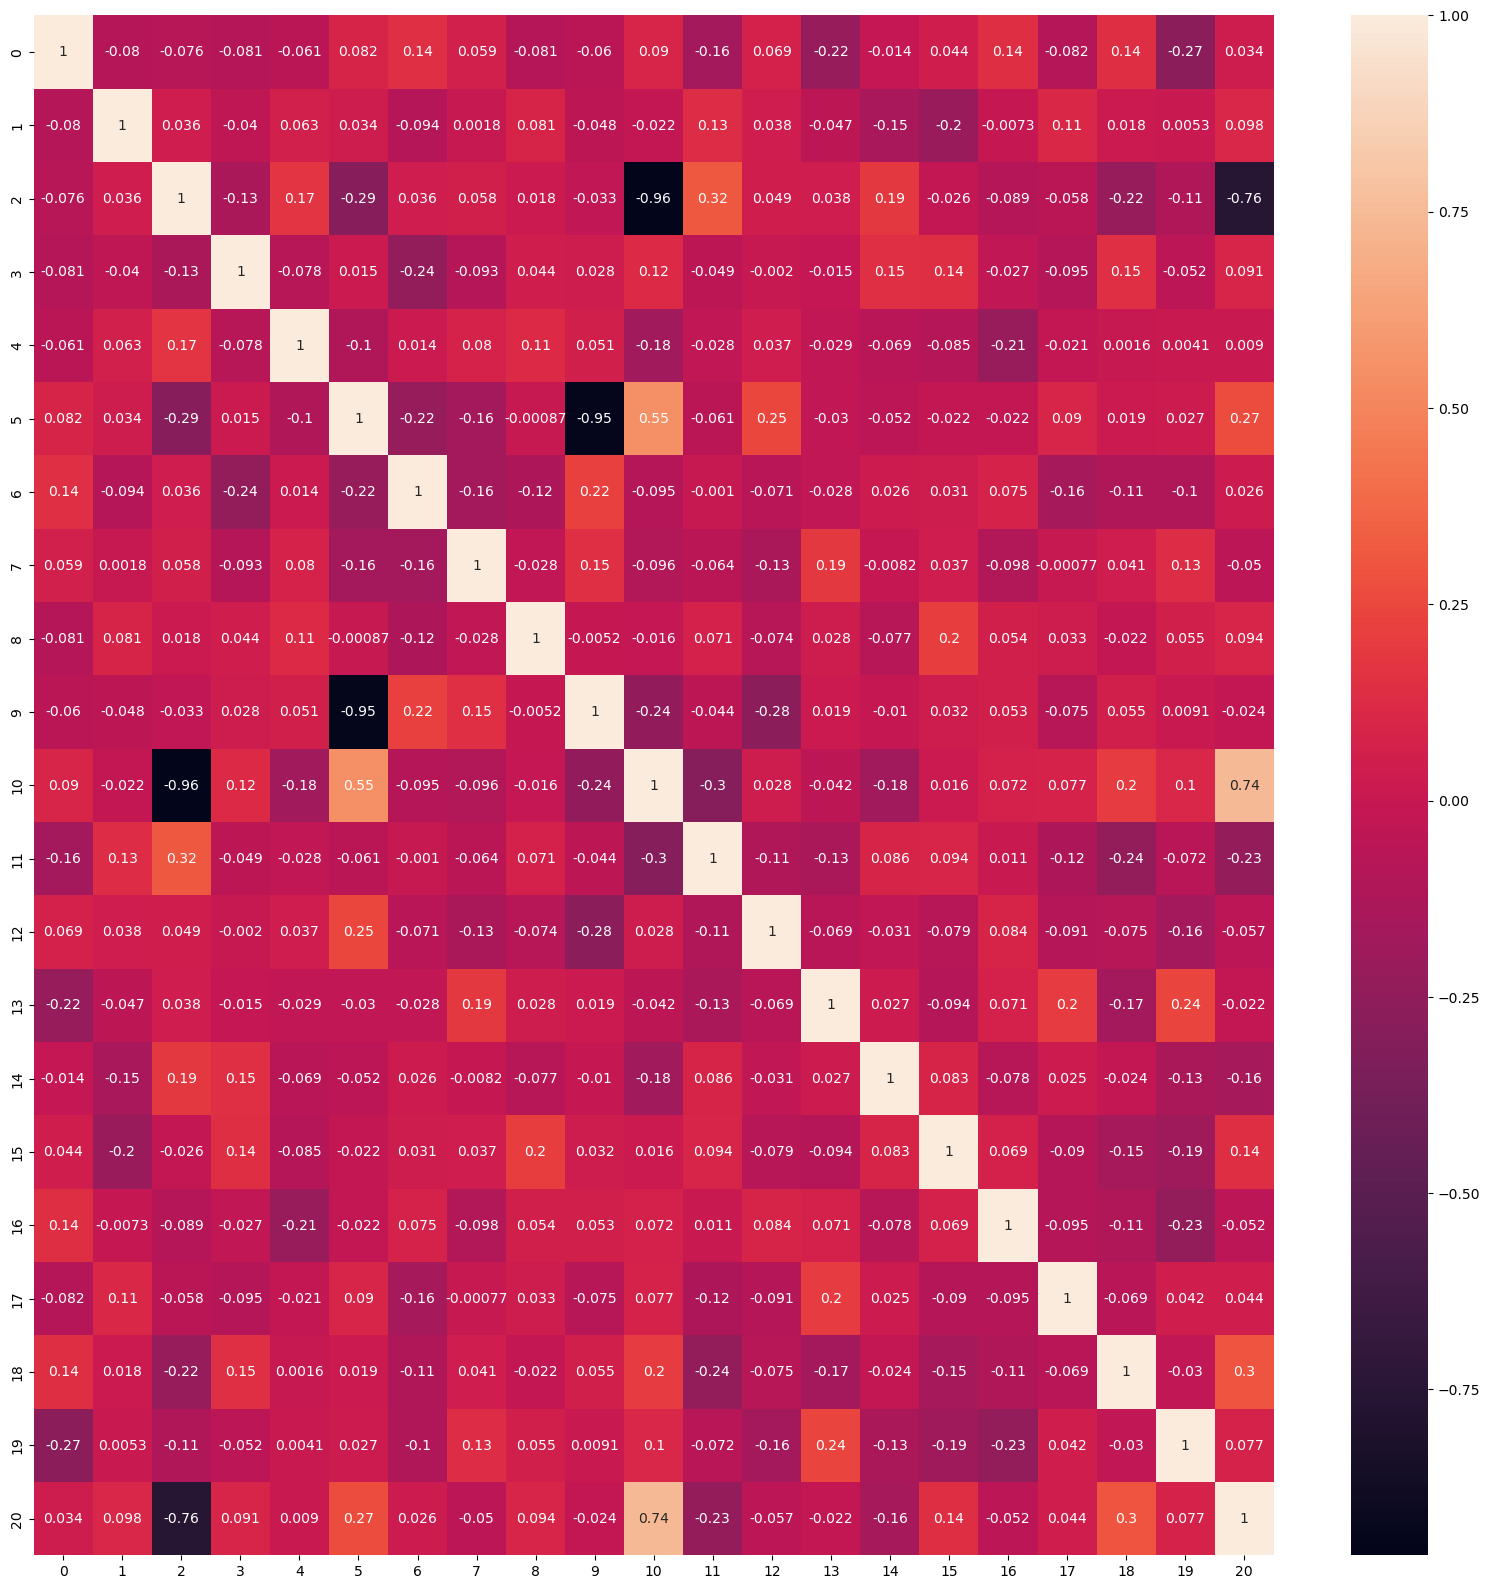

In [483]:
corr = dataframe.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

Целевой признак - 20

Пусть k - Модуль коэффициента корреляции, тогда:

$k < 0.09 $ у признаков: 0, 1, 4, 6, 7, 8, 9, 12, 13, 16, 17, 19 

$0.09 <= k < 0.3 $ у признаков: 1, 3, 5, 8, 11, 14, 15

$0.3 <= k $  у признака: 2, 10, 18

In [589]:
X = pd.DataFrame(dataframe)
X = X[[1, 2, 3, 5, 8, 10, 11, 14, 15, 18]]
X.shape

(100, 10)

#### b) Отсеките низковариативные признаки (VarianceThreshold)

In [590]:
from sklearn.feature_selection import VarianceThreshold

In [591]:
selector = VarianceThreshold(threshold=0.9)
X = selector.fit_transform(X)

In [592]:
X.shape

(100, 8)

In [593]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7
0,0.918050,-0.268138,0.720499,0.379630,0.498902,-1.113473,-0.574102,0.317527
1,0.360720,-0.994557,-1.056750,0.472322,-1.202370,-0.207879,0.623504,0.245012
2,0.218441,0.971630,-0.536866,0.407030,0.951771,0.278636,0.417830,-2.159946
3,0.220817,-2.428915,1.186775,-3.426268,2.949635,-1.753006,1.537450,-1.848552
4,0.352536,-0.366370,0.179341,0.729832,-0.980246,0.802047,-0.683062,0.875741


#### c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b

In [594]:
accuracy1 = cross_val_score(LogisticRegression(), X, y_data_generated, scoring='accuracy').mean()
print(f'Средняя точность после отбора признаков на основе корреляции и низковариативности: {accuracy1}')

Средняя точность после отбора признаков на основе корреляции и низковариативности: 0.89


### 4. Осуществите отбор признаков на основе дисперсионного анализа:

In [490]:
from sklearn.feature_selection import SelectKBest, f_classif

#### a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5))

In [611]:
best_features_f = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)

In [612]:
best_features_f.shape

(100, 5)

#### b) Повторите п. 2 на отобранных признаках

In [613]:
accuracy_f = cross_val_score(LogisticRegression(), best_features_f, y_data_generated, scoring='accuracy').mean()
print(f"Средняя точность после отбора признаков на основе дисперсионного анализа: {accuracy_f}")

Средняя точность после отбора признаков на основе дисперсионного анализа: 0.9


### 5. Отбор с использованием моделей:

#### a) Реализуйте отбор признаков с помощью логистической регрессии
Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [614]:
from sklearn.feature_selection import SelectFromModel

In [615]:
logreg_model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
selector_l1 = SelectFromModel(LogisticRegression())
selector_l1.fit(x_data_generated, y_data_generated)
selected_features_l1 = selector_l1.transform(x_data_generated)

In [616]:
selected_features_l1.shape

(100, 7)

#### b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance

In [617]:
from sklearn.ensemble import RandomForestClassifier

In [599]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_data_generated, y_data_generated)
feature_importances = pd.DataFrame({'feature': x_data_generated.columns, 'importance': rf_model.feature_importances_})

In [600]:
selected_features_rf = x_data_generated[feature_importances.nlargest(7, 'importance')['feature'].values]

In [601]:
selected_features_rf.shape

(100, 7)

#### c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b

In [602]:
accuracy_model_feature = cross_val_score(LogisticRegression(), selected_features_l1, y_data_generated, scoring='accuracy').mean()
accuracy_rf_feature = cross_val_score(LogisticRegression(), selected_features_rf, y_data_generated, scoring='accuracy').mean()

In [603]:
print(f'Средняя точность после отбора признаков с помощью логистической регрессии и L1 регуляризации: {accuracy_model_feature}')
print(f'Средняя точность после отбора признаков с помощью модели RandomForest и feature_importance: {accuracy_rf_feature}')

Средняя точность после отбора признаков с помощью логистической регрессии и L1 регуляризации: 0.8800000000000001
Средняя точность после отбора признаков с помощью модели RandomForest и feature_importance: 0.9


### 6. Перебор признаков:

#### a) SequentialFeatureSelector

In [505]:
from sklearn.feature_selection import SequentialFeatureSelector

*Подбираем подходящее значение 'n_features_to_select'*

In [578]:
sfs = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=4)
sfs.fit(x_data_generated, y_data_generated)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=4)

In [579]:
sfs.get_support()

array([ True, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [580]:
X_ = sfs.transform(x_data_generated)

#### b) Повторите п. 2 на отобранных признаках

In [581]:
accuracy_feature_selector = cross_val_score(LogisticRegression(), X_, y_data_generated, scoring='accuracy').mean()
print(f'Средняя точность после перебора признаков с помощью SequentialFeatureSelector: {accuracy_feature_selector}')

Средняя точность после перебора признаков с помощью SequentialFeatureSelector: 0.9200000000000002


### 7. Сформулируйте выводы по проделанной работе:
В рамках работы были рассмотрены несколько методов отбора признаков: 

|Способ выбора признаков|Количество признаков|Средняя точность модели|
|:---|:---:|---:|
| Необработанный датасет  | 20 | 0.86 |
| На основе корреляции и низковариативности | 8  | 0.89 |
| SelectKBest | 5 | 0.90 |
| SelectFromModel | 7 | 0.90 |
| SequentialFeatureSelector| 4 | 0.92


**Отбор признаков позволяет улучшить показатели модели.** В данном случае, лучше всего показал себя Перебор признаков, хотя определение "правильного" количества производился вручную.

Каждый метод обладает своими тонкостями, которые необходимо учитывать для достижения максимально верных вариантов.